In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import os
import tensorflow as tf

In [2]:
path = '/home/mhovhannisyan/Desktop/SJSU/270: DATA PROCESS/test-20230417T025203Z-001/test/combined/14.png'
#path = '/home/mhovhannisyan/Desktop/SJSU/270: DATA PROCESS/Pill-Defects-main/defect/pic.6.1566.0.png'

float32
(800, 800, 3)


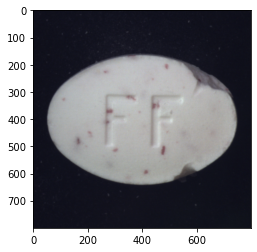

In [3]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread(path)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

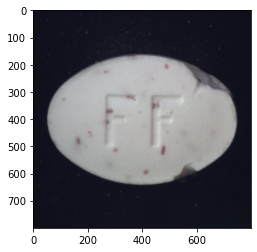

In [5]:
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [6]:
img.shape


(800, 800, 3)

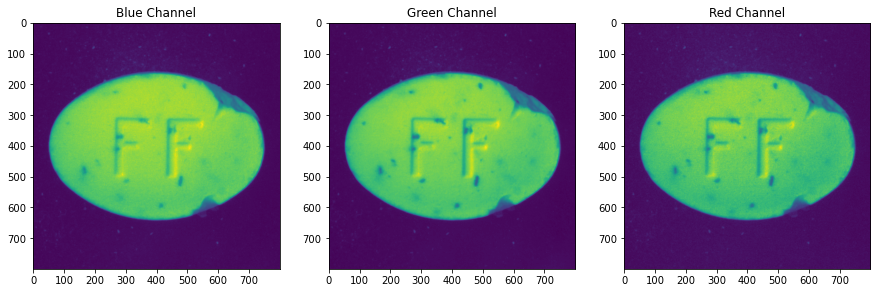

In [7]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [8]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,19,16,16,17,17,16,16,16,16,16,...,16,18,19,19,19,18,17,15,14,14
1,18,17,17,17,17,16,16,16,16,16,...,18,20,22,23,23,22,21,17,14,16
2,16,18,18,16,16,15,15,16,16,17,...,17,20,22,23,23,22,21,17,14,16
3,16,18,17,16,16,15,15,16,16,17,...,17,20,22,23,24,22,21,17,15,15
4,16,17,17,16,16,16,16,17,17,17,...,16,19,21,22,23,21,20,17,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,13,13,18,18,18,18,13,13,14,14,...,16,16,17,18,19,20,19,18,16,15
796,16,16,17,17,17,17,14,14,14,14,...,16,16,17,18,20,21,19,18,16,15
797,16,16,17,17,17,17,15,15,14,14,...,16,16,15,15,16,16,17,18,17,16
798,17,17,17,17,16,16,16,16,15,15,...,16,16,15,15,15,15,17,18,17,16


In [9]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [10]:
n = 50

In [11]:
pca_b = PCA(n_components=n)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=n)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=n)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [12]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(800, 50)
(800, 50)
(800, 50)


In [13]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9992674521486652
Green Channel: 0.9993872293418165
Red Channel  : 0.9986625874507616


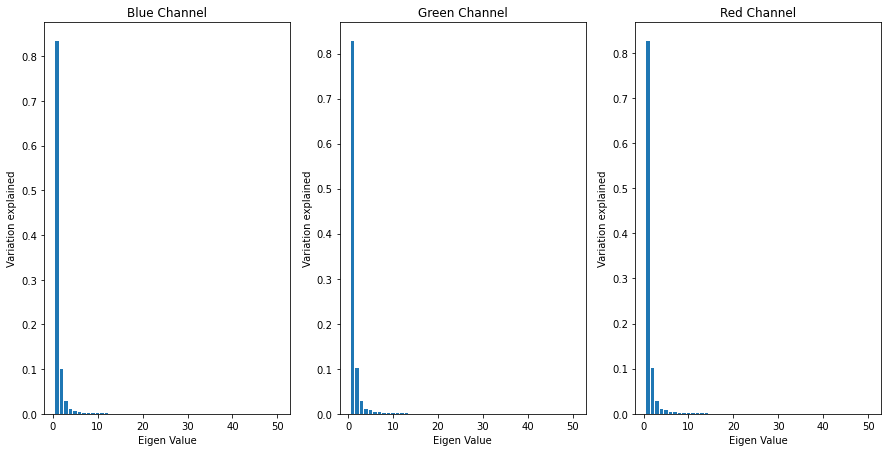

In [14]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,n+1)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,n+1)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,n+1)),pca_r.explained_variance_ratio_)
plt.show()

In [15]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(800, 800) (800, 800) (800, 800)


In [16]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(800, 800, 3)


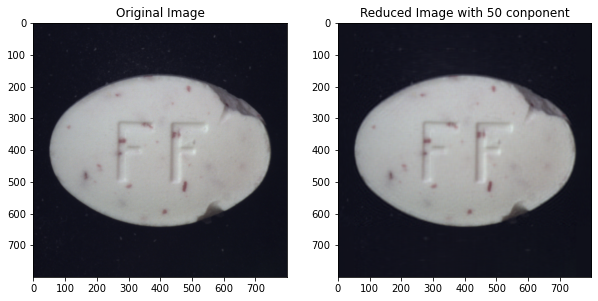

In [17]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image with " + str(n)+ ' conponent')
plt.imshow(img_reduced)
plt.show()

---